# Task 2: Image Classification with CNNs (50%)

In this task, you'll dive into the world of Convolutional Neural Networks (CNNs) by working with the CIFAR-10 dataset, a staple in image classification challenges. Your goal is to build and evaluate two different CNN models to classify images into one of the ten categories accurately.

The dataset is availabel in pytorch and keras.

## Part 1: Custom CNN Model (20%)

- Design and train a CNN model from scratch tailored for the CIFAR-10 dataset.
- Focus on the architecture that you believe will perform best for this specific task.
- Integrate various techniques such as batch normalization, dropout, learning rate schedulers, and early stopping to improve model training. Experiment with these methods and finetune them to see how they affect training stability, convergence speed, and overall performance.

## Part 2: Transfer Learning Model (20%)

- Implement a transfer learning approach using a pre-trained model of your choice.
- Fine-tune the model on the CIFAR-10 dataset to achieve the best possible performance.

## Evaluation (10%)

Ensure that both models are robust and generalized well to unseen data.

After training both models, you will evaluate them on a provided test dataset.

Compare your models based on:
- **AUC-ROC**: How well does each model discriminate between classes?
- **Model Size**: Consider the trade-offs in model complexity.
- **Inference Speed**: Evaluate how quickly your model can predict classes for new images.

Reflect on the performance, size, and inference speed of both models. What insights can you draw from these comparisons?

### Learning Objectives

- Understand and apply CNNs for image classification.
- Explore the impact of model architecture on performance and efficiency.
- Learn the process and benefits of transfer learning in deep learning.

Remember, the key to this task is not just about achieving the highest accuracy but also understanding the strengths and limitations of different approaches in machine learning model development.

## Part 1: Custom CNN Model

In [1]:
# Import necessary libraries and modules
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

### Loading and Analyzing the CIFAR-10 dataset for the (CNN) model

- Loading the dataset and spliting it into training and testing images arrays (`x_train` and `x_test`) as well as the shapes of the training and testing labels arrays (`y_train` and `y_test`)

In [2]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset and returns the training and testing data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


### Analyzing the data

The CIFAR-10 dataset consists of images categorized into 10 classes.

- **Images:**
  - `x_train`: Training images array has a shape of `(50000, 32, 32, 3)`.
    - This indicates that there are 50,000 images in the training set.
    - Each image is represented as a 32x32 grid of pixels.
    - The `3` represents the three color channels (RGB) for each pixel.

  - `x_test`: Testing images array has a shape of `(10000, 32, 32, 3)`.
    - There are 10,000 images in the testing set, similar to the training set.
    - Each image is also represented as a 32x32 grid of pixels with three color channels.

- **Labels:**
  - `y_train`: Training labels array has a shape of `(50000, 1)`.
    - This indicates that there are 50,000 labels corresponding to the training images.
    - Each label is a single integer representing the class of the corresponding image.

  - `y_test`: Testing labels array has a shape of `(10000, 1)`.
    - Similar to the training set, there are 10,000 labels corresponding to the testing images.
    - Each label is also a single integer representing the class of the corresponding image.

In [3]:
# Print the shapes of the CIFAR-10 data arrays
print('The Shape of the CIFAR-10 data:')
print('===============================')
print(f'The shape of the images(x_train, x_test): {x_train.shape} | {x_test.shape}')
print('----------------------------------------------------------------------------------')
print(f'The shape of the labels(y_train, y_test): {y_train.shape} | {y_test.shape}')
print('----------------------------------------------------------------------------------')

The Shape of the CIFAR-10 data:
The shape of the images(x_train, x_test): (50000, 32, 32, 3) | (10000, 32, 32, 3)
----------------------------------------------------------------------------------
The shape of the labels(y_train, y_test): (50000, 1) | (10000, 1)
----------------------------------------------------------------------------------


### Visualizing CIFAR-10 Images with Labels

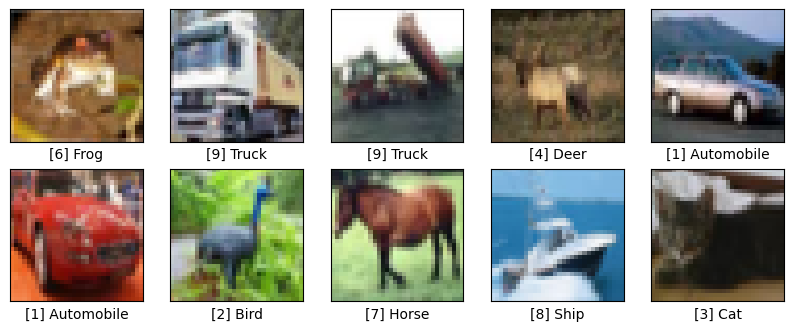

In [4]:
# Define class names corresponding to CIFAR-10 labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(10, 10))

# Iterate over the first 10 images in the training set
for i in range(10):
    # Create subplots in a 5x5 grid
    plt.subplot(5, 5, i+1)
    plt.xticks([]) # Hide x-axis ticks
    plt.yticks([]) # Hide y-axis ticks
    plt.grid(False) # Disable grid lines
    plt.imshow(x_train[i]) # Display image
    # Display label below each image
    plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i][0]]))

# Display the plot
plt.show()

### Data Preprocessing: Normalization and One-Hot-Encoding
- **Normalization**:
  - Pixel values of images are normalized to the range [0, 1] by dividing each pixel value by 255.
  - This helps in improving the convergence of the neural network during training.

- **One-Hot-Encoding**:
  - Labels are one-hot-encoded using the `to_categorical` function from Keras utilities.
  - This converts each integer label into a binary vector where only the corresponding class index is 1 and all other elements are 0.
  - The original shape of the labels is (50000, 1) for training data and (10000, 1) for testing data.

In [5]:
# Normalizing the pixel values of images to the range [0, 1]
X_train = x_train / 255
X_test = x_test / 255

# One-Hot-Encoding the labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

# Print shapes of the data before and after encoding
print(f'Shape of the data before encoding: {y_train.shape}')
print(f'Shape of the data after encoding: {Y_train.shape}')


Shape of the data before encoding: (50000, 1)
Shape of the data after encoding: (50000, 10)


### Creating a Custom Convolutional Neural Network (CNN) Model
- **Input Layer**:
  - An input layer is defined with a shape of (32, 32, 3), corresponding to the height, width, and color channels of the CIFAR-10 images.

- **Convolutional Blocks**:
  - Three convolutional blocks are defined, each consisting of convolutional layers, batch normalization, max pooling, and dropout regularization.
  - The number of filters and dropout rates gradually increase across the blocks to capture more complex features and prevent overfitting.

- **Flatten and Dense Layers**:
  - The output from the convolutional layers is flattened and fed into a dense layer with 256 units and ReLU activation.
  - Batch normalization and dropout regularization are applied to the dense layer to improve training stability and prevent overfitting.

- **Output Layer**:
  - The output layer consists of 10 units with softmax activation, representing the probabilities of the input image belonging to each of the 10 CIFAR-10 classes.

(reference): https://www.kaggle.com/code/muhammadibrahimqasmi/cifar-10-cnn-image-classification?scriptVersionId=164937306&cellId=18

In [6]:
# Define input layer with shape (32, 32, 3)
inputs = tf.keras.Input(shape=(32,32,3))

# First convolutional block
input = tf.keras.layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same')(inputs)
input = tf.keras.layers.BatchNormalization()(input)
input = tf.keras.layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same')(input)
input = tf.keras.layers.BatchNormalization()(input)
input = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(input)
input = tf.keras.layers.Dropout(0.2)(input)

# Second convolutional block
input = tf.keras.layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same')(input)
input = tf.keras.layers.BatchNormalization()(input)
input = tf.keras.layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same')(input)
input = tf.keras.layers.BatchNormalization()(input)
input = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(input)
input = tf.keras.layers.Dropout(0.25)(input)

# Third convolutional block
input = tf.keras.layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same')(input)
input = tf.keras.layers.BatchNormalization()(input)
input = tf.keras.layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same')(input)
input = tf.keras.layers.BatchNormalization()(input)
input = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(input)
input = tf.keras.layers.Dropout(0.35)(input)

# Flatten the output and add dense layers
input = tf.keras.layers.Flatten()(input)
input = tf.keras.layers.Dense(256, activation='relu')(input)
input = tf.keras.layers.BatchNormalization()(input)
input = tf.keras.layers.Dropout(0.5)(input)

# Output layer
output = tf.keras.layers.Dense(10, activation='softmax')(input)

# Create the custom model
custom_model = tf.keras.Model(inputs, output)

### Custom Model Summary

The summary of the custom convolutional neural network (CNN) model is as follows:

In [7]:
# Display the summary of the custom (CNN) model
custom_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0     

### Compiling the Custom Model

  - **loss:** `categorical_crossentropy`, suitable for multi-class classification tasks.
  - **optimizer:** `adam`, commonly used optimizer.

In [8]:
# Compile the custom model
custom_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Implementing Early Stopping

- **Configuration**:
  - We monitor the `val_loss`, which is the loss on the validation dataset, to determine if the model is continuing to learn and generalize.
  - The `patience` parameter is set to 10, meaning that we will stop training if we do not see any improvement in the validation loss for 10 consecutive epochs.

In [9]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

### Training the Custom Model

Training the custom (CNN) model on the CIFAR-10 dataset.

In [10]:
# Train the custom model
history = custom_model.fit(X_train, Y_train, epochs=50, verbose=1,
                    validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/50
1563/1563 [==============================] - 44s 22ms/step - loss: 1.5572 - accuracy: 0.4681 - val_loss: 1.2210 - val_accuracy: 0.5786
Epoch 2/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9484 - accuracy: 0.6714 - val_loss: 1.0834 - val_accuracy: 0.6285
Epoch 3/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7602 - accuracy: 0.7392 - val_loss: 0.7411 - val_accuracy: 0.7470
Epoch 4/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6407 - accuracy: 0.7830 - val_loss: 0.8297 - val_accuracy: 0.7241
Epoch 5/50
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5574 - accuracy: 0.8097 - val_loss: 0.5771 - val_accuracy: 0.8063
Epoch 6/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4845 - accuracy: 0.8339 - val_loss: 0.7404 - val_accuracy: 0.7564
Epoch 7/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4339 - accuracy: 0.8529 - val_loss: 0.5806 -

### Saving the Custom Model

In [11]:
# Save the custom model
custom_model.save('custom_CNN_model')

## Part 2: Transfer Learning Model

- **List of references:**
    - https://keras.io/api/applications/
    - https://keras.io/guides/transfer_learning/
    - https://www.kaggle.com/code/phoebewongtw/transfer-learning-with-xception-for-cifar-10
    - https://www.tensorflow.org/tutorials/images/transfer_learning#un-freeze_the_top_layers_of_the_model

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

### Loading the CIFAR-10 dataset

- Loading the dataset and spliting it into training and testing images arrays (`x_train` and `x_test`) as well as the shapes of the training and testing labels arrays (`y_train` and `y_test`)

In [13]:
# Load the CIFAR-10 dataset and returns the training and testing data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Loading the MobileNetV2 Base Model

`MobileNetV2` was my choice becasue of its lightweight which allows for efficiency and speed. And because it had some helpful resources supporting it.

In [14]:
# Load MobileNetV2 base model
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


### Preprocessing Data with MobileNetV2
- **Input Preprocessing**:
  - The `preprocess_input` function from `tf.keras.applications.mobilenet_v2` preprocesses the input images according to the requirements of the MobileNetV2 model.

- **Label Encoding**:
  - Labels are converted

In [15]:
# Preprocess input images using MobileNetV2 preprocessing function
X_train = tf.keras.applications.mobilenet_v2.preprocess_input(x_train)
X_test = tf.keras.applications.mobilenet_v2.preprocess_input(x_test)

# Ensure labels are in the appropriate format
Y_train = to_categorical(y_train,10)
Y_test = to_categorical(y_test,10)

### Freezing Layers of the MobileNetV2 Base Model

In [16]:
# Freeze the layers of the MobileNetV2 base model
base_model.trainable = False

### Creating the Transfer Learning Model

- **Input Layer**:
  - An input layer is defined with a shape of (32, 32, 3), corresponding to the height, width, and color channels of the CIFAR-10 images.

- **Image Resizing**:
  - The input images are resized to match the input shape expected by MobileNetV2 (224x224) using a lambda layer.

- **Base Model**:
  - The resized input is passed through the MobileNetV2 base model with frozen weights (i.e., `training=False`), ensuring that the base model's pre-trained weights are not updated during training.

- **Global Average Pooling**:
  - A global average pooling layer is added to reduce the spatial dimensions of the base model's output.

- **Dense Layer**:
  - A dense layer with 256 units and ReLU activation is added to extract higher-level features from the base model's output.

- **Dropout Layer**:
  - A dropout layer with a dropout rate of 0.45 is added for regularization, helping prevent overfitting during training.

- **Output Layer**:
  - The final output layer consists of 10 units with softmax activation, representing the probabilities of the input image belonging to each of the 10 CIFAR-10 classes.

In [17]:
# Define input layer with shape (32, 32, 3)
inputs = tf.keras.Input(shape=(32, 32, 3))

# Resize input images to match the input shape of MobileNetV2 (224x224)
resized_input = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(inputs)

# Pass the resized input through the MobileNetV2 base model with frozen weights
base_model_output = base_model(resized_input, training=False)

# Global average pooling layer to reduce spatial dimensions
global_average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)

# Dense layer with 256 units and ReLU activation
dense_layer = tf.keras.layers.Dense(256, activation='relu')(global_average_pooling)

# Dropout layer for regularization
dropout_layer = tf.keras.layers.Dropout(0.45)(dense_layer)

# Output layer with 10 units and softmax activation
output_layer = tf.keras.layers.Dense(10, activation='softmax')(dropout_layer)

# Create the transfer learning model
transfer_model = tf.keras.Model(inputs, output_layer)

### Display the summary of the transfer learning model
The summary of the transfer learning model is as follows:

In [18]:
# Display the summary of the transfer learning model
transfer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0   

### Compiling the Transfer Learning Model
  - **optimizer:** `adam`, commonly used optimizer.
  - **loss:** `categorical_crossentropy`, suitable for multi-class classification tasks.

In [19]:
# Compile the transfer learning model
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the Transfer Learning Model without Fine-Tuning

In [20]:
# Train the transfer learning model without fine-tuning
history_without_fine_tuning = transfer_model.fit(X_train, Y_train, verbose=1,
                    validation_data=(X_test, Y_test),
                    epochs=3)

Epoch 1/3
1563/1563 [==============================] - 74s 44ms/step - loss: 0.8413 - accuracy: 0.7150 - val_loss: 0.5138 - val_accuracy: 0.8257
Epoch 2/3
1563/1563 [==============================] - 77s 49ms/step - loss: 0.5509 - accuracy: 0.8112 - val_loss: 0.4668 - val_accuracy: 0.8406
Epoch 3/3
1563/1563 [==============================] - 77s 50ms/step - loss: 0.4868 - accuracy: 0.8334 - val_loss: 0.4408 - val_accuracy: 0.8481


### Counting the Number of Layers in MobileNetV2
This information can help us to experiment more with the model when we want to unfreeze layers during fine tuning

In [21]:
# Count the number of layers in the MobileNetV2 base model
print(f"Number of layers in the MobileNet V2: {len(base_model.layers)} layer")

Number of layers in the MobileNet V2: 154 layer


### Selectively Freezing Layers of MobileNetV2
- **Layer Freezing**:
  - The `trainable` attribute of the base model is set to `True` to allow training of its layers.
  - A for loop is used to iterate through the layers of the base model up to a certain index (63 in this case).
  - Each layer's `trainable` attribute is set to `False`, effectively freezing them from training.

### Fine-Tuning Strategy:

By freezing the layers up to a certain index, we can fine-tune only the later layers of the MobileNetV2 base model while keeping the earlier layers frozen. This allows us to adapt the model to the specific characteristics of the CIFAR-10 dataset.

In [22]:
# Set the base model to trainable
base_model.trainable = True

# Freeze layers up to a certain index
for layer in base_model.layers[:63]:
    layer.trainable = False

### Recompiling the Transfer Learning Model
- **Optimizer and Learning Rate**:
  - The Adam optimizer is used with a learning rate of (0.00005).
  - By adjusting the learning rate, we can control the step size of the weight updates, potentially improving the model's convergence and performance since transfer learning models tend to overfit.\
(reference): https://www.tensorflow.org/tutorials/images/transfer_learning#compile_the_model_2

In [23]:
# Recompile the transfer learning model with a different optimizer and learning rate
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the Transfer Learning Model with Fine-Tuning

In [24]:
# Train the transfer learning model with fine-tuning
history_with_fine_tuning = transfer_model.fit(X_train, Y_train, verbose=1,
                    validation_data=(X_test, Y_test),
                    epochs=3)

Epoch 1/3
1563/1563 [==============================] - 136s 76ms/step - loss: 0.3732 - accuracy: 0.8765 - val_loss: 0.2633 - val_accuracy: 0.9125
Epoch 2/3
1563/1563 [==============================] - 128s 82ms/step - loss: 0.2169 - accuracy: 0.9262 - val_loss: 0.2256 - val_accuracy: 0.9225
Epoch 3/3
1563/1563 [==============================] - 119s 76ms/step - loss: 0.1506 - accuracy: 0.9489 - val_loss: 0.2012 - val_accuracy: 0.9332


## Evaluation


### Loading Test Data

In [25]:
import numpy as np

# Load test images and labels
sample_images = np.load('task_2_test_images.npy')
sample_labels = np.load('task_2_test_labels.npy')

### Preprocessing and Normalizing Test Dataset for custom (CNN) model
- **Image Preprocessing**:
  - The test dataset images are divided by 255.0 to scale the pixel values to the range [0, 1], making them suitable as input to the model.

- **Label Encoding**:
  - Labels are converted to categorical format using one-hot encoding to match the format used during model training.

In [26]:
# Preprocess and normalizing test images
Sample_images1 = sample_images / 255

# Ensure labels are in the appropriate format
Sample_labels1 = tf.keras.utils.to_categorical(sample_labels, 10)

### Preprocessing and Normalizing Test Dataset with MobileNetV2 for Transfer Learning model
- **Image Preprocessing**:
  - The test dataset images are preprocessed using the MobileNetV2 preprocessing function provided by `tf.keras.applications.mobilenet_v2`, to align them with the preprocessing applied during the training of MobileNetV2.

- **Label Encoding**:
  - Labels are converted to categorical format using one-hot encoding to match the format used during model training.

In [27]:
# Preprocess additional test images using MobileNetV2 preprocessing function
Sample_images2 = tf.keras.applications.mobilenet_v2.preprocess_input(sample_images)

# Ensure labels are in the appropriate format
Sample_labels2 = tf.keras.utils.to_categorical(sample_labels, 10)

### Evaluating the Custom (CNN) Model
- **Model Size**:
  - The number of parameters in the custom (CNN) model is calculated using the `count_params` method.
  - The size of the model is then converted to MB for easier interpretation.

- **Inference Process**:
  - The inference process is timed using the `time` module to measure the model's inference speed.

- **Evaluation Metrics**:
  - The custom (CNN) model is evaluated on the additional test data, providing metrics such as loss and accuracy.
  - The AUC-ROC score is calculated to assess the model's performance in multi-class classification tasks.

In [28]:
import time
from sklearn.metrics import roc_auc_score

# Calculate the number of parameters in the custom model
custom_model_size = custom_model.count_params()

# Convert the size of the custom model to MB
custom_model_size_in_mb = (custom_model_size * 4) / (1024 * 1024)

# Evaluate the custom model on the additional test data
test_loss1, test_accuracy1 = custom_model.evaluate(Sample_images1, Sample_labels1)

# Start timing the inference process
start1 = time.time()

# Make predictions using the custom model
prediction1 = custom_model.predict(Sample_images1)

# End timing the inference process
end1 = time.time()

# Calculate the AUC-ROC score
auc_roc1 = roc_auc_score(Sample_labels1, prediction1, multi_class="ovo", average="macro")


# Calculate the inference speed of the custom model
custom_model_inference_speed = end1 - start1

# Print evaluation results
print("Evaluation:")
print("==============================================")
print(f"Size of the custom (CNN) model: {custom_model_size} (params)")
print("-------------------------------------------------------------")
print(f"Size of the custom (CNN) model: {custom_model_size_in_mb:.2f} (MB)")
print("-------------------------------------------------------------")
print(f"AUC_ROC of the custom (CNN) model: {auc_roc1:.3f}")
print("-------------------------------------------------------------")
print(f"Inference speed of the custom (CNN) model: {custom_model_inference_speed:.2f}")
print("-------------------------------------------------------------")
print(f"Custom (CNN) model accuracy: {test_accuracy1:.3f}")
print("-------------------------------------------------------------")

312/312 [==============================] - 2s 5ms/step
Evaluation:
Size of the custom (CNN) model: 1517450 (params)
-------------------------------------------------------------
Size of the custom (CNN) model: 5.79 (MB)
-------------------------------------------------------------
AUC_ROC of the custom (CNN) model: 0.958
-------------------------------------------------------------
Inference speed of the custom (CNN) model: 3.12
-------------------------------------------------------------
Custom (CNN) model accuracy: 0.722
-------------------------------------------------------------


### Evaluating the Transfer Learning Model
- **Model Size**:
  - The number of parameters in the transfer learning model is calculated using the `count_params` method.
  - The size of the model is then converted to MB for easier interpretation.

- **Inference Process**:
  - The inference process is timed using the `time` module to measure the model's inference speed.

- **Evaluation Metrics**:
  - The transfer learning model is evaluated on the additional test data, providing metrics such as loss and accuracy.
  - The AUC-ROC score is calculated to assess the model's performance in multi-class classification tasks.

In [29]:
# Calculate the number of parameters in the transfer learning model
transfer_model_size = transfer_model.count_params()

# Convert the size of the transfer learning model to MB
transfer_model_size_in_mb = (transfer_model_size * 4) / (1024 * 1024)

# Evaluate the transfer learning model on the additional test data
test_loss2, test_accuracy2 = transfer_model.evaluate(Sample_images2, Sample_labels2)

# Start timing the inference process
start2 = time.time()

# Make predictions using the transfer learning model
prediction2 = transfer_model.predict(Sample_images2)

# End timing the inference process
end2 = time.time()

# Calculate the AUC-ROC score
auc_roc2 = roc_auc_score(Sample_labels2, prediction2, multi_class="ovo", average="macro")

# Calculate the inference speed of the transfer learning model
transfer_model_inference_speed = end2 - start2

# Print evaluation results
print("Evaluation:")
print("==============================================")
print(f"Size of the transfer learning model: {transfer_model_size} (params)")
print("-------------------------------------------------------------")
print(f"Size of the transfer learning model: {transfer_model_size_in_mb:.2f} (MB)")
print("-------------------------------------------------------------")
print(f"AUC_ROC of the transfer learning model: {auc_roc2:.3f}")
print("-------------------------------------------------------------")
print(f"Inference speed of the transfer learning model: {transfer_model_inference_speed:.2f}")
print("-------------------------------------------------------------")
print(f"Transfer learning model accuracy: {test_accuracy2:.3f}")
print("-------------------------------------------------------------")

312/312 [==============================] - 11s 34ms/step
Evaluation:
Size of the transfer learning model: 2588490 (params)
-------------------------------------------------------------
Size of the transfer learning model: 9.87 (MB)
-------------------------------------------------------------
AUC_ROC of the transfer learning model: 0.961
-------------------------------------------------------------
Inference speed of the transfer learning model: 21.62
-------------------------------------------------------------
Transfer learning model accuracy: 0.732
-------------------------------------------------------------


Both the custom Convolutional Neural Network (CNN) model and the Transfer Learning model were evaluated on a provided test dataset to assess their performance, size, and inference speed.

### **AUC-ROC**

The Transfer Learning model exhibits a slightly higher AUC-ROC score compared to the custom CNN model. This indicates that the Transfer Learning model better discriminates between classes in the test dataset.

### **Model Size**

- **Custom CNN Model**: 1,517,450 parameters
- **Transfer Learning Model**: 2,588,490 parameters

The Transfer Learning model has a larger size compared to the custom CNN model. This is expected since Transfer Learning models typically leverage pre-trained architectures, which may have more parameters. However, it's worth noting that the increase in size comes with the benefit of leveraging pre-existing knowledge from the pre-trained model.

### **Inference Speed**

The custom CNN model demonstrates significantly faster inference speed compared to the Transfer Learning model. This is likely due to the larger size and complexity of the Transfer Learning model, which results in longer inference times.

### **Performance Insights**

- **AUC-ROC**: The Transfer Learning model outperforms the custom CNN model in terms of discriminating between classes, indicating its superior ability to classify images accurately.
- **Model Size**: The custom CNN model is more lightweight in terms of parameters, making it more suitable for deployment in resource-constrained environments or applications where model size is a critical factor.
- **Inference Speed**: The custom CNN model excels in inference speed, making it more suitable for applications that require real-time or low-latency predictions.

### **Conclusion**

In conclusion, while the Transfer Learning model demonstrates better classification performance, the custom CNN model offers advantages in terms of model size and inference speed. The choice between the two models depends on the specific requirements of the application, weighing factors such as classification accuracy, model size, and inference speed.
